# Edge detection

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
from copy import copy

from os.path import join
from cv2 import resize
from skimage.io import imread, imsave, imshow
from skimage.color import gray2rgb
from PIL import Image

In [2]:
# Make path for resized data
resized_data_path = "resized_data"
if not os.path.exists(resized_data_path):
    os.mkdir(resized_data_path)

In [3]:
# Load images
dir_name     = './photo_data/'                       # directory of photo folder
sub_folder_name = ['cars', 'people', 'flowers']      # sub folder names under the directory

file_name_list = []
for sf_name in sub_folder_name:
    for f in os.listdir(join(dir_name, sf_name)):
        file_name = os.path.splitext(os.path.basename(f))[0] + '.jpg'
        image = Image.open(join(dir_name, sf_name, f))
        shape = np.asarray(image).shape
        file_name_list.append(file_name)
        if shape[1] > shape[0]:
            image_resize = image.resize((640, 480), Image.LANCZOS)            # resize photos
            image_resize.save(str(resized_data_path) + '/' + file_name)
        else:
            image_resize = image.resize((480, 640), Image.LANCZOS)
            image_resize.save(str(resized_data_path) + '/' + file_name)
        continue

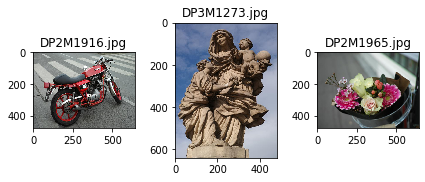

In [4]:
# Draw photo samples
horz = 5
vert = 2
graph_num = horz * vert
axes = []

fig = plt.figure(figsize=(12, 6))

for i in range(0, len(file_name_list)):
    axes.append(fig.add_subplot(vert, horz, i + 1))
    pict = Image.open(resized_data_path + '/' + file_name_list[i])
    axes[i].imshow(pict)
    axes[i].set_title(file_name_list[i])

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

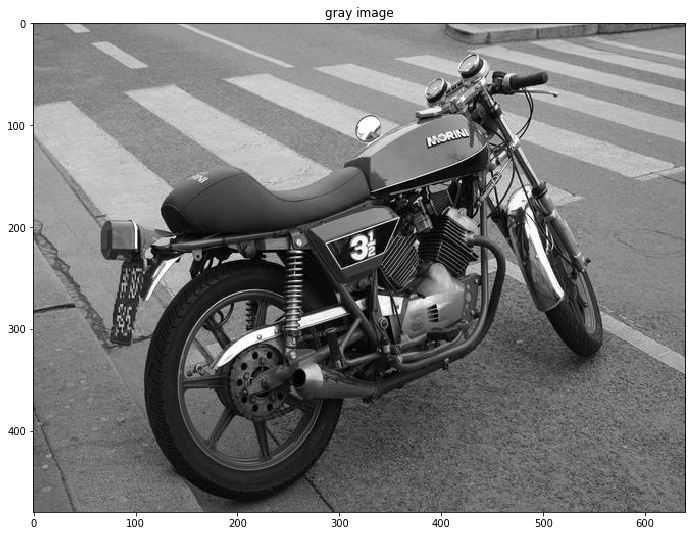

In [5]:
image = cv2.imread(resized_data_path + '/' + 'DP2M1916.jpg',0)

plt.figure(figsize = (12, 9))
plt.imshow(image, cmap = 'gray')
plt.title('gray image')
plt.show()

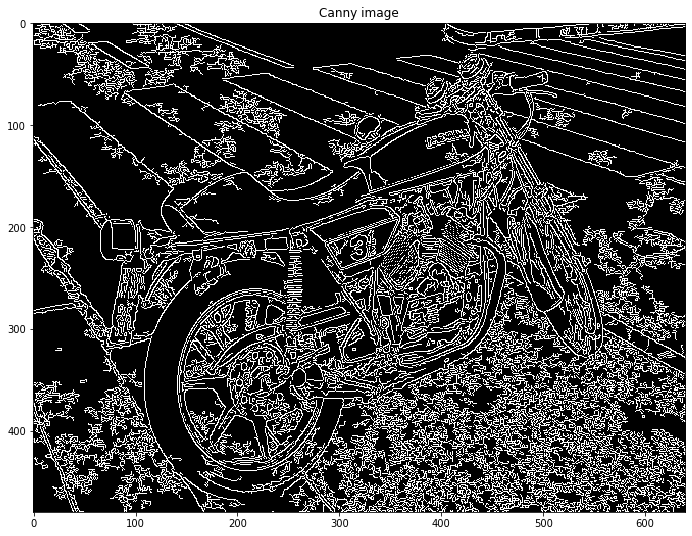

In [6]:
# Canny
canny_image = cv2.Canny(image, 10, 200)

plt.figure(figsize = (12, 9))
plt.imshow(canny_image, cmap = 'gray')
plt.title('Canny image')
plt.show()

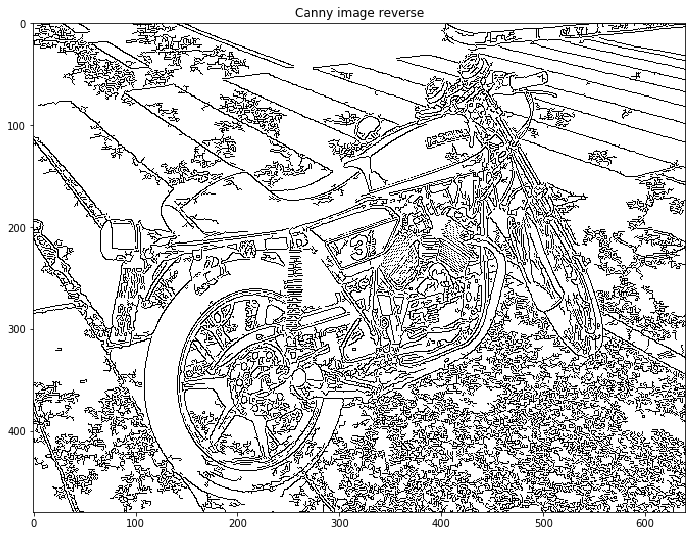

In [7]:
# Canny reverse
canny_image_2 = cv2.bitwise_not(canny_image)

plt.figure(figsize = (12, 9))
plt.imshow(canny_image_2, cmap = 'gray')
plt.title('Canny image reverse')
plt.show()

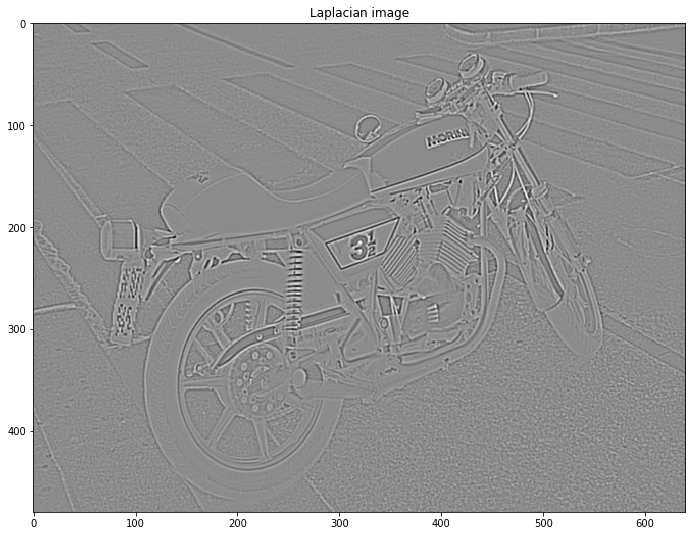

In [8]:
## Laplacian
Laplacian_image = cv2.Laplacian(image, cv2.CV_64F, ksize = 5)

plt.figure(figsize = (12, 9))
plt.imshow(Laplacian_image, cmap = 'gray')
plt.title('Laplacian image')
plt.show()

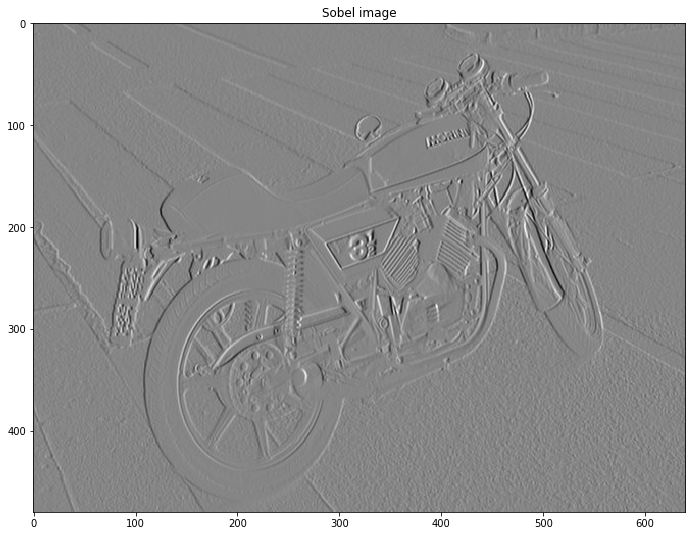

In [9]:
## Sobel
Sobel_image = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = 3)

plt.figure(figsize = (12, 9))
plt.imshow(Sobel_image, cmap = 'gray')
plt.title('Sobel image')
plt.show()